<a href="https://colab.research.google.com/github/dongxiaohuang/Tensorflow2.0_notes/blob/main/tf2_models_api_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import numpy as np

In [2]:
tf.__version__

'2.4.1'

# MNIST dataset loader

In [34]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data('mnist.npz')

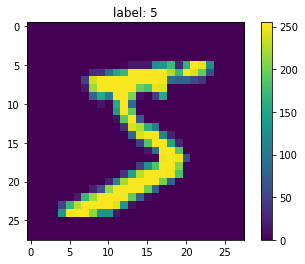

In [35]:
import matplotlib.pyplot as plt
def show_image(image, label):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.title(f'label: {label}')
    plt.show()
show_image(x_train[0], y_train[0])

In [37]:
# normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255  #把数值变成0-1之间的浮点数。
x_test /= 255

# show shapes
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

# Sequential API v1

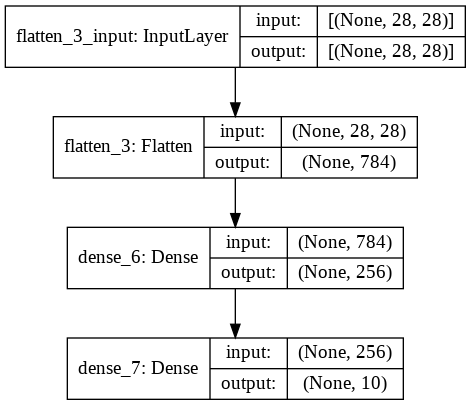

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

seq_model_v1 = Sequential([Flatten(input_shape=(28,28)),
                    Dense(256, 'relu'),
                    Dense(10, 'softmax')])

plot_model(seq_model_v1, show_shapes=True, show_layer_names=True, to_file='seq_model_v1.png')

In [46]:
seq_model_v1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
seq_model_v1.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3746 - accuracy: 0.8917
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0957 - accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0612 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0390 - accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0297 - accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0186 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0119 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0117 - accuracy: 0.9963
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.009

In [47]:
seq_model_v1.evaluate(x_test, y_test) # not only gives the loss, but also the specified accuracy metrics as defined in model.compile

313/313 [==============================] - 1s 1ms/step - loss: 0.0755 - accuracy: 0.9802


[0.07549795508384705, 0.9801999926567078]

In [48]:
seq_model_v1.predict(x_test)

array([[9.8387166e-11, 1.4520075e-12, 5.8956123e-10, ..., 9.9999392e-01,
        1.0637201e-09, 2.4582994e-06],
       [1.0654924e-10, 1.3828195e-07, 9.9999988e-01, ..., 4.9918379e-21,
        2.1620518e-10, 9.6004757e-18],
       [3.1332694e-09, 9.9988866e-01, 3.9996380e-06, ..., 4.9921246e-06,
        1.0127754e-04, 1.1264751e-09],
       ...,
       [5.5948098e-16, 4.1090713e-14, 2.6751256e-17, ..., 3.8614925e-10,
        1.0173664e-08, 8.4178751e-08],
       [1.4833087e-16, 8.8199415e-19, 6.1393429e-20, ..., 9.6558357e-16,
        2.6846351e-08, 1.1201376e-18],
       [6.5504230e-12, 2.6704242e-18, 1.2573897e-12, ..., 6.7807662e-21,
        2.1936261e-17, 1.5064812e-19]], dtype=float32)

# Sequence API v2

In [53]:
seq_model_v2 = Sequential()
seq_model_v2.add(Flatten(input_shape=(28,28)))
seq_model_v2.add(Dense(256, 'relu'))
seq_model_v2.add(Dense(10, 'softmax'))

seq_model_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
seq_model_v2.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3768 - accuracy: 0.8936
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0968 - accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0631 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0420 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0293 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0234 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0163 - accuracy: 0.9951
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0137 - accuracy: 0.9961
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0134 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.008

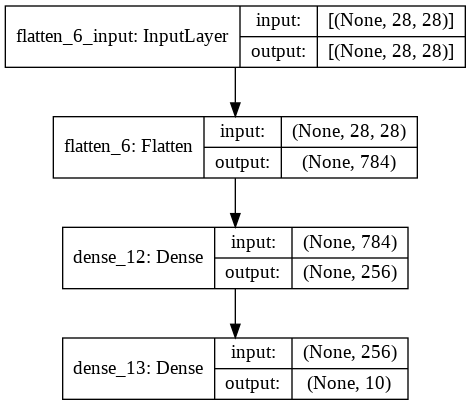

In [54]:
plot_model(seq_model_v2, show_shapes=True, show_layer_names=True, to_file='seq_model_v2.png')

In [55]:
seq_model_v2.evaluate(x_test, y_test) # not only gives the loss, but also the specified accuracy metrics as defined in model.compile

313/313 [==============================] - 1s 1ms/step - loss: 0.0867 - accuracy: 0.9792


[0.08665982633829117, 0.979200005531311]

In [56]:
seq_model_v2.predict(x_test)

array([[1.1669785e-09, 1.0080622e-11, 9.7672466e-09, ..., 9.9999976e-01,
        7.8999036e-11, 6.8956716e-09],
       [3.2743867e-15, 7.1579575e-13, 1.0000000e+00, ..., 2.0263764e-23,
        3.7656962e-09, 8.2471644e-18],
       [1.0100872e-08, 9.9990880e-01, 6.0007311e-05, ..., 2.4133838e-05,
        4.8385800e-06, 1.3808039e-09],
       ...,
       [3.1869744e-17, 2.3701964e-14, 4.3719044e-19, ..., 5.5063179e-08,
        3.8848486e-12, 5.7180799e-08],
       [4.0697255e-12, 9.4533240e-19, 9.9237652e-17, ..., 6.7418402e-15,
        3.8166547e-08, 1.9619480e-17],
       [1.2269886e-12, 6.9969948e-22, 9.0209687e-13, ..., 1.0878369e-21,
        2.5092464e-16, 2.3739910e-19]], dtype=float32)

In [91]:
def predict_single_image_by_model(model, image):
  single_image_encode = tf.expand_dims(
      image, 0, name=None
  )
  prediction_digit = np.argmax(seq_model_v2.predict(single_image_encode))
  show_image(image, prediction_digit)

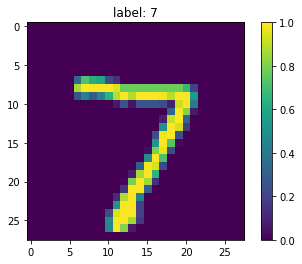

In [92]:
predict_single_image_by_model(seq_model_v2, x_test[0])

# Functional API

In [84]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

inputs = Input(shape=(28,28))
x = Flatten()(inputs)
x = Dense(256, 'relu')(x)
outputs = Dense(10, 'softmax')(x)

func_model = Model(inputs=inputs, outputs=outputs)

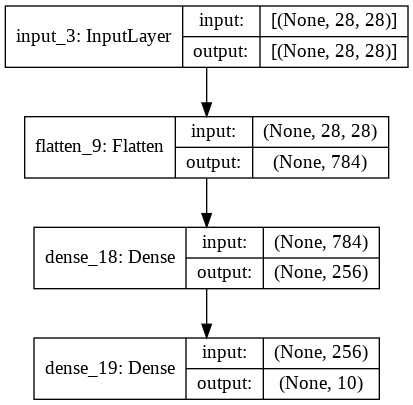

In [85]:
plot_model(func_model, show_layer_names=True, show_shapes=True)

In [86]:
func_model(x_test)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0.06476841, 0.15882796, 0.08753388, ..., 0.10418176, 0.0987823 ,
        0.056632  ],
       [0.11976592, 0.09389384, 0.06432436, ..., 0.05270205, 0.09847891,
        0.06877186],
       [0.1033151 , 0.15686116, 0.08001517, ..., 0.06814651, 0.10594232,
        0.06730799],
       ...,
       [0.07548504, 0.20091365, 0.08177911, ..., 0.05654684, 0.12068632,
        0.06924216],
       [0.15405902, 0.11187218, 0.05342562, ..., 0.06120231, 0.1578359 ,
        0.08649036],
       [0.06086406, 0.0712475 , 0.04834902, ..., 0.08036576, 0.10745031,
        0.10409313]], dtype=float32)>

In [87]:
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [88]:
func_model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3766 - accuracy: 0.8917
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0974 - accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0613 - accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0327 - accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - accuracy: 0.9939
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0188 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0126 - accuracy: 0.9963
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0109 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.010

In [89]:
func_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9810


[0.08421739935874939, 0.9810000061988831]

In [90]:
func_model.predict(x_test)

array([[6.0192579e-10, 1.9498793e-12, 4.3918529e-11, ..., 9.9999750e-01,
        6.3062840e-11, 2.3376408e-06],
       [4.1398360e-19, 5.0080471e-11, 1.0000000e+00, ..., 1.2840272e-20,
        9.7736489e-15, 4.4738585e-26],
       [3.5472535e-11, 9.9998200e-01, 7.5932473e-07, ..., 2.3354187e-06,
        1.4776809e-05, 1.3439566e-10],
       ...,
       [5.3482663e-24, 8.1594551e-17, 5.5085826e-21, ..., 3.9344167e-11,
        4.5354050e-13, 4.8704503e-09],
       [1.3960162e-14, 1.2260281e-18, 3.4724624e-18, ..., 1.4502799e-17,
        5.8743210e-10, 5.5185658e-16],
       [5.2596870e-13, 2.1968144e-19, 5.3158686e-11, ..., 1.7782058e-20,
        5.1310911e-16, 2.8752058e-18]], dtype=float32)

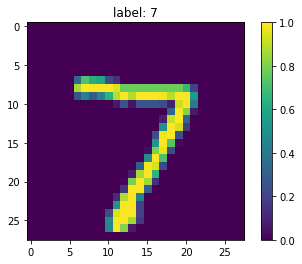

In [93]:
predict_single_image_by_model(func_model, x_test[0])

# Subclass Model API

In [102]:
class CustomModel(tf.keras.models.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.flatten = Flatten()
    self.dense1 = Dense(256, 'relu')
    self.dense2 = Dense(10, 'softmax')
  
  def call(self, inputs):
    x = self.flatten(inputs)
    x = self.dense1(x)
    x = self.dense2(x)
    return x
  
cus_model = CustomModel()

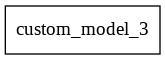

In [103]:
plot_model(cus_model, show_layer_names=True, show_shapes=True)

In [104]:
cus_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [106]:
cus_model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3865 - accuracy: 0.8863
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0985 - accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0596 - accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0426 - accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0216 - accuracy: 0.9936
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0196 - accuracy: 0.9939
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0134 - accuracy: 0.9963
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.009

In [107]:
cus_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0808 - accuracy: 0.9797


[0.08077117055654526, 0.9797000288963318]

In [108]:
cus_model.predict(x_test)

array([[3.47994344e-09, 1.27126892e-10, 1.38370787e-10, ...,
        9.99996066e-01, 4.32768682e-10, 2.05583638e-06],
       [4.50242843e-13, 1.27812849e-09, 1.00000000e+00, ...,
        3.76133736e-25, 8.15100551e-14, 1.16998114e-20],
       [4.38931502e-10, 9.99869108e-01, 1.55325085e-06, ...,
        8.84224428e-05, 3.64978514e-05, 1.22989907e-09],
       ...,
       [8.99178310e-19, 9.29717339e-16, 3.16860229e-16, ...,
        2.80260815e-09, 1.05147642e-07, 2.53693088e-06],
       [1.08777674e-11, 3.20240023e-16, 4.42030033e-17, ...,
        1.86545302e-14, 1.34591073e-06, 1.64021759e-17],
       [4.83246472e-13, 1.13283451e-20, 6.99417087e-13, ...,
        7.47630912e-20, 6.23084591e-18, 1.20106890e-16]], dtype=float32)

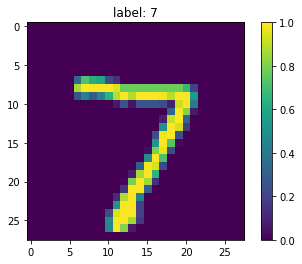

In [109]:
predict_single_image_by_model(cus_model, x_test[0])